In [149]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("../../logs/train_metrics_20251129_1850.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index
0,0,11.037417,11.045001,NaN,0.000000,1907.810431,0.000000e+00,1
1,8,11.044883,NaN,NaN,0.000000,82776.199898,0.000000e+00,2
2,16,11.047561,NaN,NaN,7.750599,32046.394599,4.792332e-07,1
3,24,11.046171,NaN,NaN,7.750599,82302.585752,4.792332e-07,0
4,32,10.998854,NaN,NaN,7.500737,85729.316110,9.584665e-07,1
...,...,...,...,...,...,...,...,...
62495,499960,2.911468,NaN,NaN,0.259785,81913.047465,3.000001e-05,3
62496,499968,2.749178,2.795852,NaN,0.265251,84259.928576,3.000001e-05,3
62497,499976,2.931504,NaN,NaN,0.265251,82138.366993,3.000001e-05,0
62498,499984,2.551987,NaN,NaN,0.256522,84975.100081,3.000000e-05,2


In [150]:
df_metrics.shard_index.unique()

array([1, 2, 0, 3])

In [151]:
df_metrics[df_metrics["val_loss"].notnull()].tail(10)

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index
62352,498816,2.984995,2.796521,NaN,0.249711,84550.345163,0.00003,1
62368,498944,2.712096,2.797248,NaN,0.248056,84584.757809,0.00003,3
62384,499072,2.942776,2.795998,NaN,0.289516,84924.413651,0.00003,2
62400,499200,2.845109,2.796421,NaN,0.267838,85170.428998,0.00003,0
62416,499328,2.815259,2.797677,NaN,0.255243,85376.415376,0.00003,1
62432,499456,2.738859,2.796723,NaN,0.252918,85070.054670,0.00003,3
62448,499584,2.854064,2.796426,NaN,0.236077,84936.029782,0.00003,3
62464,499712,2.944249,2.795924,NaN,0.242053,85024.023597,0.00003,1
62480,499840,2.377167,2.795606,NaN,0.246307,84632.676856,0.00003,3
62496,499968,2.749178,2.795852,NaN,0.265251,84259.928576,0.00003,3


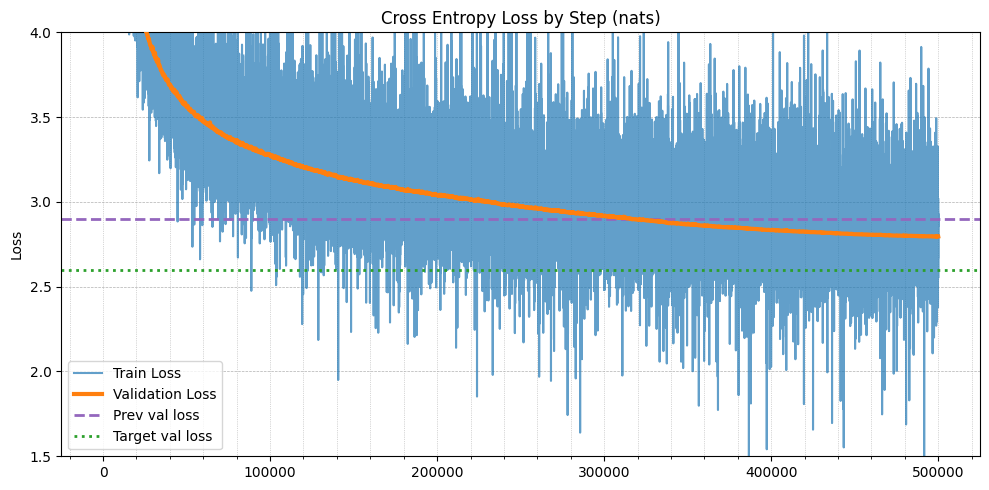

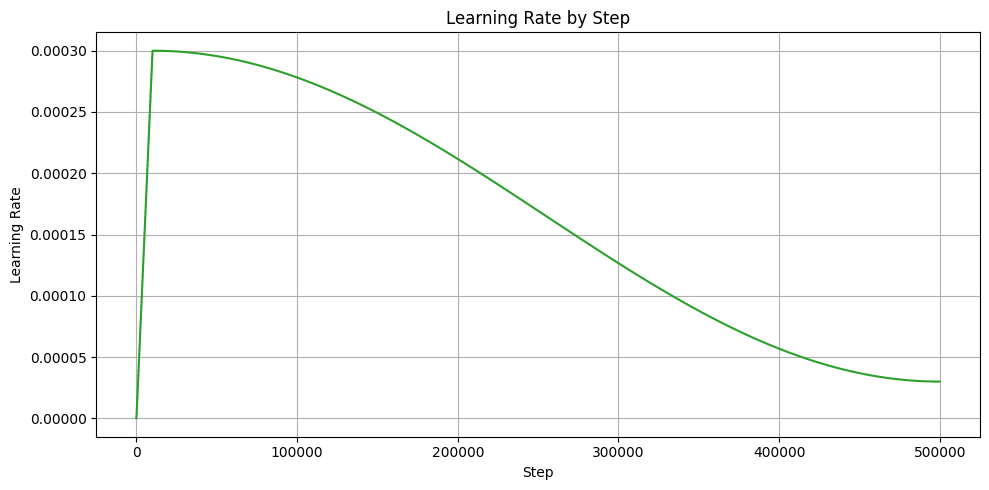

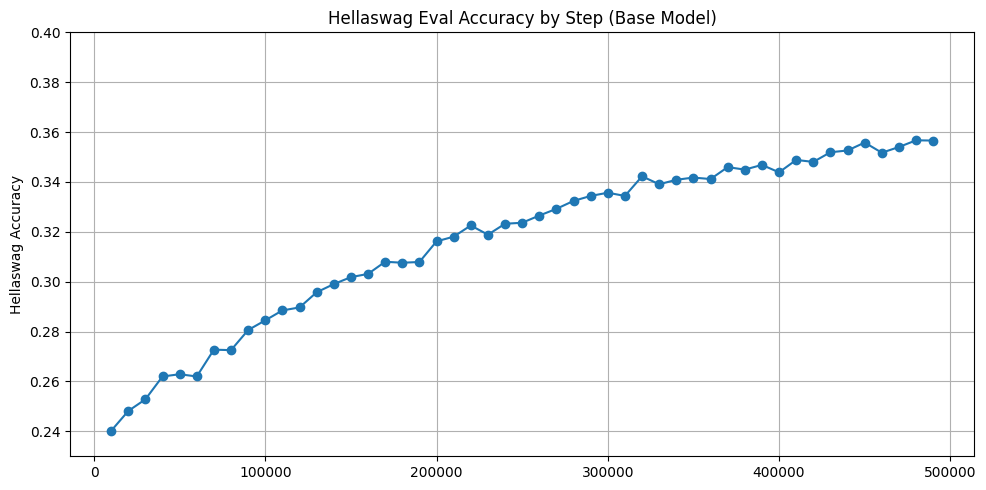

In [152]:
# Training Loss Figure

fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)

ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)

# Add horizontal lines for previous and target val loss
ax1.axhline(2.9, color="tab:purple", linestyle="--", linewidth=2, label="Prev val loss")
ax1.axhline(2.6, color="tab:green", linestyle=":", linewidth=2, label="Target val loss")

ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
# ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)
ax1.set_ylim(bottom=1.5, top=4)
fig1.patch.set_facecolor("white")
plt.tight_layout()
plt.show()

# Learning Rate Figure
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.set_title("Learning Rate by Step")
ax2.grid(True)
plt.tight_layout()
plt.show()

# Hellaswag Eval Accuracy Figure
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.plot(
    df_metrics["step"][df_metrics["hellaswag_acc"].notna()],
    df_metrics["hellaswag_acc"][df_metrics["hellaswag_acc"].notna()],
    color="tab:blue",
    marker="o",
)
ax3.set_ylabel("Hellaswag Accuracy")
ax3.set_title("Hellaswag Eval Accuracy by Step (Base Model)")
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.4)
plt.tight_layout()
plt.show()

/tmp/ipykernel_621620/2865931867.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


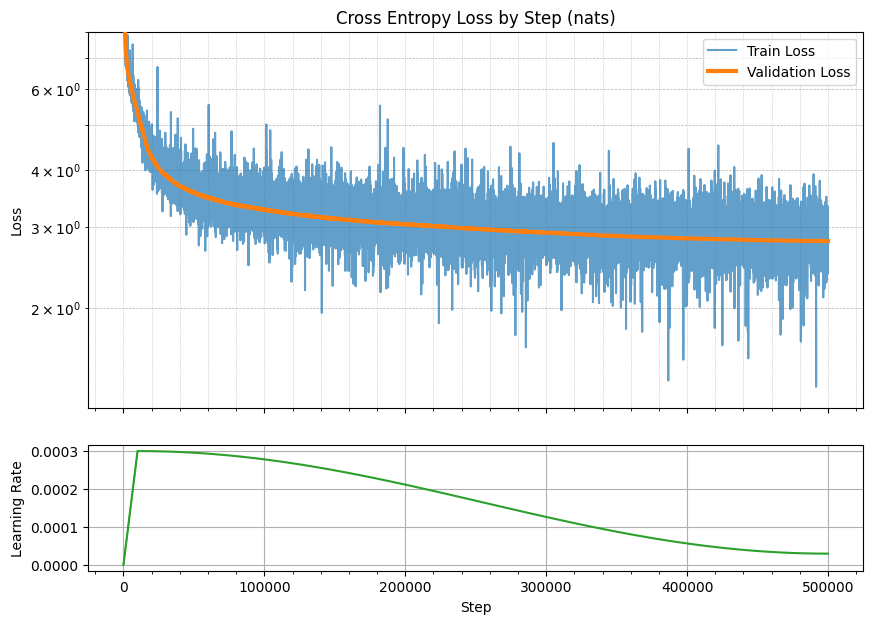

In [153]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec

# Create a figure with GridSpec to control height ratios
fig = plt.figure(figsize=(10, 7), facecolor="white")
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.15)  # loss taller, lr shorter

# --- Loss Plot ---
ax1 = fig.add_subplot(gs[0])
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)
ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)
ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_ylim(top=8.0)
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)

# Remove x-axis labels and ticks for the top plot
ax1.set_xlabel("")
ax1.tick_params(labelbottom=False)

# --- Learning Rate Plot ---
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(df_metrics["step"], df_metrics["lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.grid(True)

# Clean layout
plt.tight_layout()
plt.show()


In [139]:
# Load the contents
with open("../../logs/instruct_training_metrics.jsonl", "r") as f:
    train_instruct = [json.loads(line) for line in f]

df_instruct = pd.DataFrame(train_instruct)
df_instruct

,step,train_loss,val_loss,lr
0,0,4.197428,6.082433,1.000000e-07
1,4,3.872044,6.073633,1.000000e-07
2,8,4.115608,6.063669,1.000000e-07
3,12,3.824431,6.054693,1.000000e-07
4,16,3.635496,6.044918,1.000000e-07
...,...,...,...,...
69,128,1.306436,2.470978,1.000000e-05
70,132,1.452000,2.461656,1.000000e-05
71,136,1.391729,2.452362,1.000000e-05
72,140,1.275263,2.446076,1.000000e-05


In [ ]:
# fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
# ax1.plot(
#     df_instruct["step"],
#     df_instruct["train_loss"],
#     color="tab:blue",
#     alpha=0.7,
#     label="Train Loss",
# )

# ax1.plot(
#     df_instruct["step"][df_instruct["val_loss"].notna()],
#     df_instruct["val_loss"][df_instruct["val_loss"].notna()],
#     color="tab:orange",
#     label="Validation Loss",
#     zorder=4,
#     linewidth=3,
# )